# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
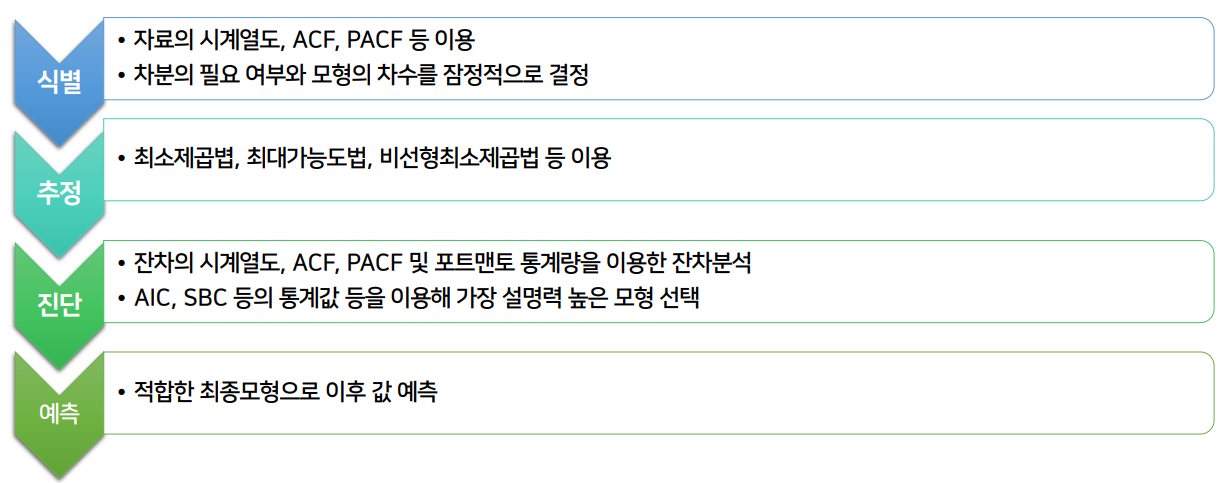

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [2]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

## 데이터 불러오기

In [10]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [11]:
samsung_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 2020-01-02 to 2021-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   322 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


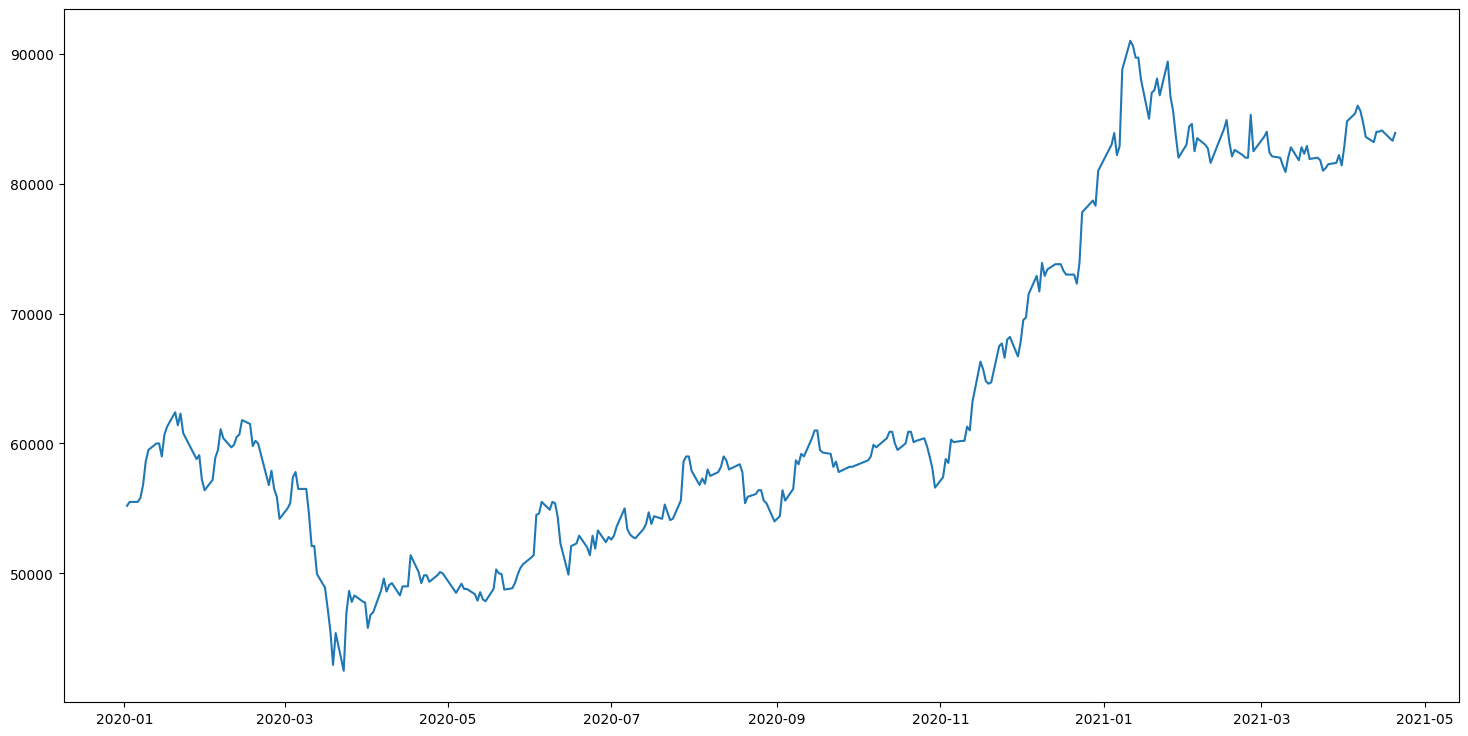

In [29]:
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, samsung_df["price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('price')
plt.show()

In [30]:
train_data = samsung_df[:len(samsung_df)-12]
test_data = samsung_df[len(samsung_df)-12:]

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(train_data['price'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      price   No. Observations:                  310
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -2632.038
Date:                                    Mon, 13 Mar 2023   AIC                           5286.077
Time:                                            21:01:47   BIC                           5327.144
Sample:                                                 0   HQIC                          5302.495
                                                    - 310                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8610      0.248      3.478      0.001       0.376       1.346
ar.L2          0.0143      0.053      0.267      0.789      -0.090       0.119
ma.L1         -0.8565      0.241     -3.553      0.000      -1.329      -0.384
ar.S.L12      -0.5723      0.139     -4.126      0.000      -0.844      -0.300
ar.S.L24       0.5683      0.139      4.095      0.000       0.296       0.840
ar.S.L36       0.9793      0.068     14.489      0.000       0.847       1.112
ar.S.L48       0.0124      0.066      0.188      0.851      -0.117       0.142
ma.S.L12       0.5954      0.222      2.688      0.007       0.161       1.030
ma.S.L24      -0.5757      0.244     -2.357      0.018      -1.055      -0.097
ma.S.L36      -0.9760      0.126     -7.740      0.000      -1.223      -0.729
sigma2      1.556e+06   2.03e-07   7.65e+12      0.000    1.56e+06    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.44
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+28. Standard errors may be unstable.
"""

In [32]:
arima_pred = arima_result.predict(start = len(train_data), end = len(samsung_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


310    84778.797412
311    84710.682571
312    86040.798448
313    86038.386508
314    85798.492191
315    85807.633713
316    86081.760501
317    86369.121460
318    86472.330780
319    86562.888113
320    86778.078398
321    86759.577054
Name: ARIMA Predictions, dtype: float64

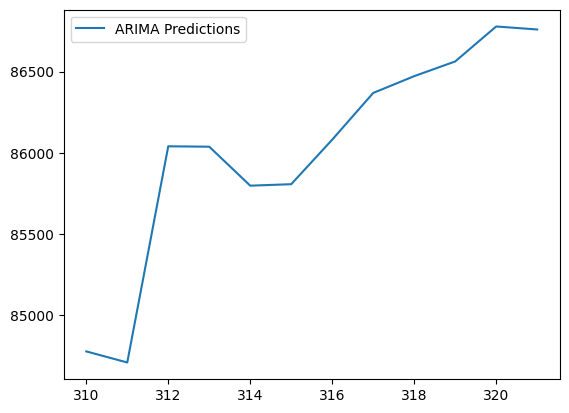

In [41]:
arima_pred.plot(legend = True);

In [42]:
from statsmodels.tools.eval_measures import rmse
arima_rmse_error = rmse(test_data['price'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = samsung_df['price'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 4883877.939981894
RMSE Error: 2209.9497596058363
Mean: 63323.60248447205


KeyError: 'ARIMA_Predictions'

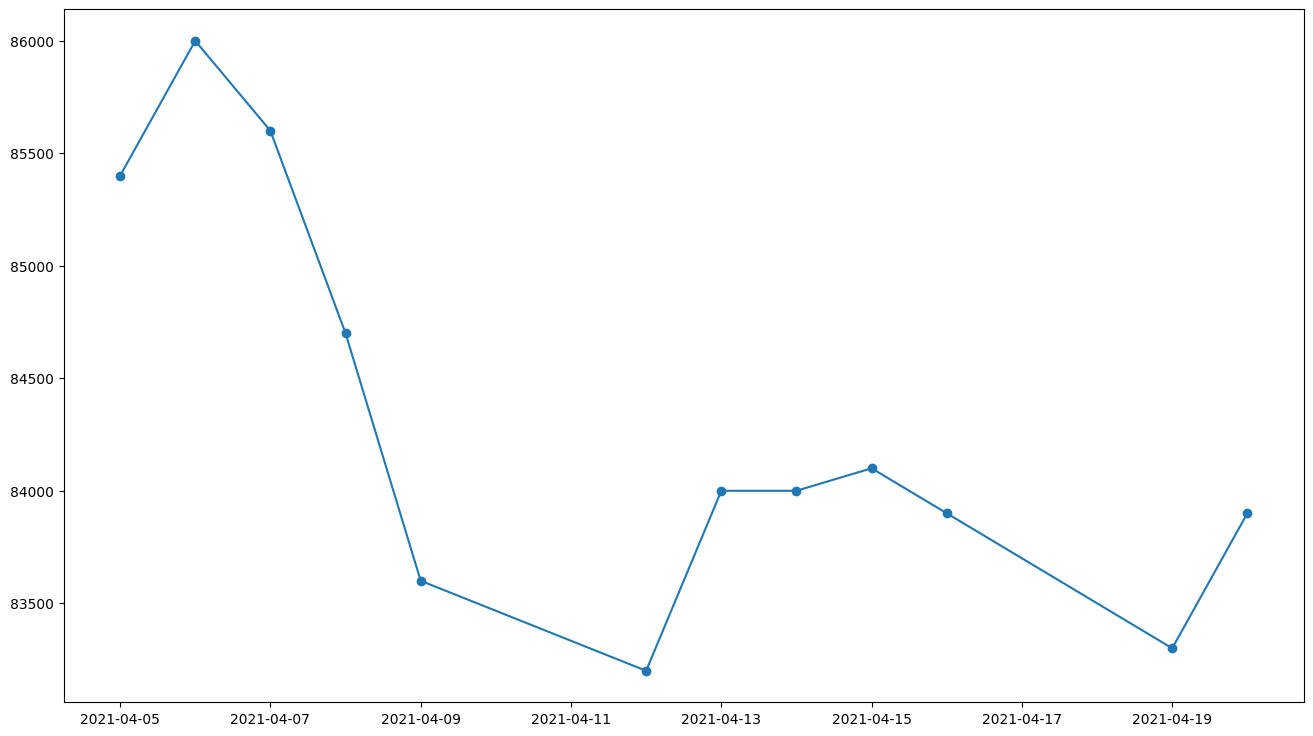

In [43]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["price"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [44]:
arima_rmse_error = rmse(test_data['price'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = samsung_df['price'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 4883877.939981894
RMSE Error: 2209.9497596058363
Mean: 63323.60248447205
